In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

In [42]:
df = pd.read_csv('Social_Network_Ads.csv')

In [43]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [45]:
df.drop('User ID', axis = 1, inplace = True)

In [46]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [47]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [48]:
Gender = pd.get_dummies(df['Gender'], drop_first = True)

In [49]:
Gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [50]:
df = pd.concat([df, Gender], axis = 1)

In [51]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [52]:
df.drop('Gender', axis = 1, inplace = True)

In [53]:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [54]:
df.corr()

,Age,EstimatedSalary,Purchased,Male
Age,1.000000,0.155238,0.622454,-0.073741
EstimatedSalary,0.155238,1.000000,0.362083,-0.060435
Purchased,0.622454,0.362083,1.000000,-0.042469
Male,-0.073741,-0.060435,-0.042469,1.000000


In [55]:
df.drop('Male', axis = 1, inplace = True)

In [56]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
ss = StandardScaler()

In [59]:
scaled_arr = ss.fit_transform(df.drop('Purchased', axis = 1))

In [60]:
scaled_arr.shape

(400, 2)

In [61]:
scaled_arr

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [62]:
X = pd.DataFrame(scaled_arr, columns = df.columns[:-1])

In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
Age                400 non-null float64
EstimatedSalary    400 non-null float64
dtypes: float64(2)
memory usage: 6.4 KB


In [64]:
X.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [65]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


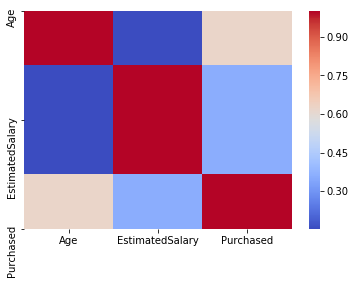

In [66]:
import seaborn as sns
sns.heatmap(df.corr(), cmap= 'coolwarm')

In [67]:
X.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [68]:
y = df['Purchased']

In [69]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [70]:
X

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [71]:
X.shape

(400, 2)

In [72]:
y.shape

(400,)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [75]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(280, 2)
(280,)
(120, 2)
(120,)


In [76]:
from sklearn.svm import SVC

In [77]:
model = SVC()

In [78]:
model.fit(X_train, y_train)

c:\programdata\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [79]:
y_pred = model.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
confusion_matrix(y_pred, y_test)

array([[70,  5],
       [ 8, 37]], dtype=int64)

In [84]:
107/120

0.8916666666666667